In [2]:
! pip install --quiet sagemaker==2.93.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.27.35 requires botocore==1.29.35, but you have botocore 1.29.41 which is incompatible.
aiobotocore 2.0.1 requires botocore<1.22.9,>=1.22.8, but you have botocore 1.29.41 which is incompatible.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.


In [3]:
import boto3
import sagemaker
import time
from time import strftime

In [4]:
boto_session = boto3.Session()
sagemaker_session = sagemaker.Session(boto_session=boto_session)
sm_client = boto3.client("sagemaker")
region = boto_session.region_name
bucket = sagemaker_session.default_bucket()
role = sagemaker.get_execution_role()
account = sagemaker_session.boto_session.client("sts").get_caller_identity()["Account"]

In [5]:
print(f"account: {account}")
print(f"bucket: {bucket}")
print(f"region: {region}")
print(f"role: {role}")

account: 441249477288
bucket: sagemaker-ap-south-1-441249477288
region: ap-south-1
role: arn:aws:iam::441249477288:role/service-role/AmazonSageMakerServiceCatalogProductsUseRole


In [6]:
from sagemaker.pytorch import PyTorchPredictor
from sagemaker.serializers import JSONSerializer, NumpySerializer
from sagemaker.deserializers import JSONDeserializer

## Testing on staging environment

In [7]:
predictor_new = PyTorchPredictor(
    endpoint_name="Intel-Classifier-Project-staging",
    sagemaker_session=sagemaker_session,
    serializer=NumpySerializer(),
    deserializer=JSONDeserializer(),
)

In [8]:
classnames = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [9]:
! wget -O building.jpg "https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/UB_tower.jpg/1200px-UB_tower.jpg"

--2023-01-01 05:31:22--  https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/UB_tower.jpg/1200px-UB_tower.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 349917 (342K) [image/jpeg]
Saving to: ‘building.jpg’

100%[======================================>] 349,917     1.22MB/s   in 0.3s   

2023-01-01 05:31:23 (1.22 MB/s) - ‘building.jpg’ saved [349917/349917]



In [10]:
from PIL import Image
import numpy

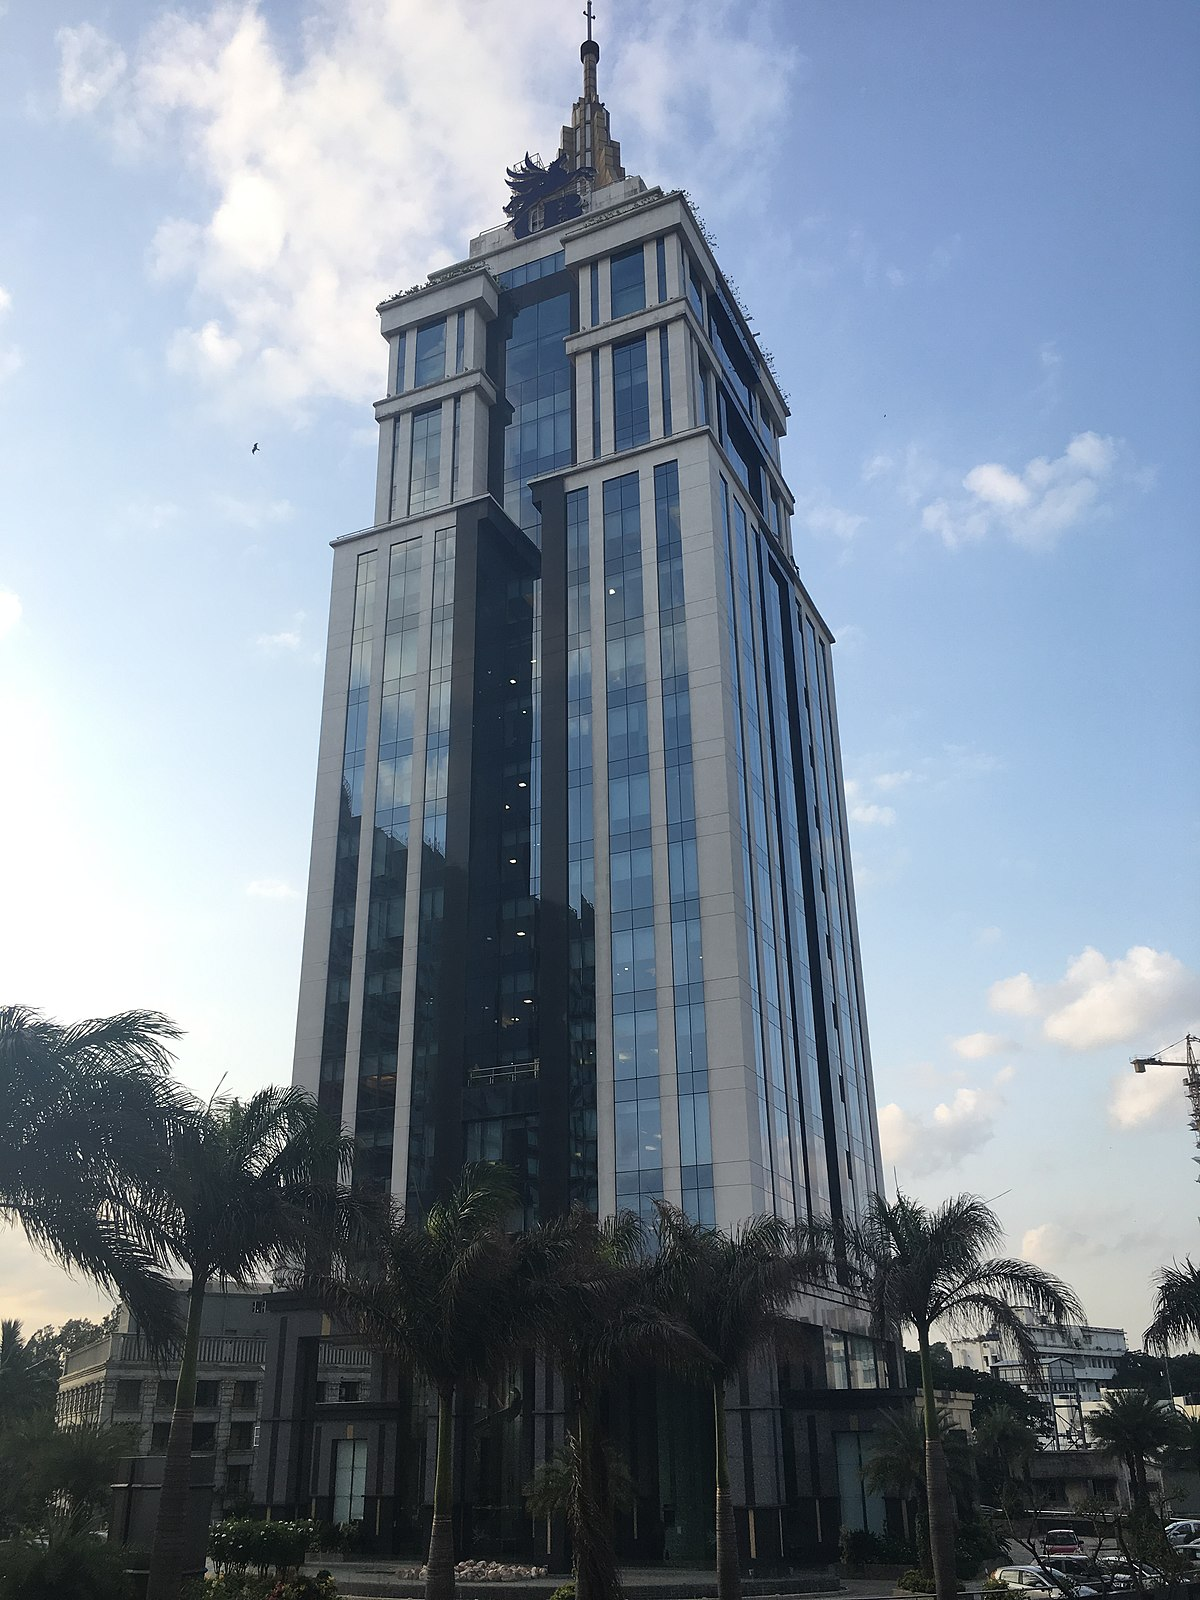

In [11]:
image = Image.open("building.jpg")
image.show()

In [12]:
# image_input = {"inputs": data}
image_input = numpy.array(image)

In [13]:
out = predictor_new.predict(image_input)

In [14]:
print(out)

{'buildings': 99.8691737651825, 'sea': 0.12341273250058293, 'mountain': 0.006237719935597852, 'glacier': 0.0011247856491536368, 'street': 4.529247235041112e-05}


In [15]:
! aws s3 cp s3://sagemaker-ap-south-1-441249477288/dataset/prediction/ . --recursive

download: s3://sagemaker-ap-south-1-441249477288/dataset/prediction/103.jpg to ./103.jpg
download: s3://sagemaker-ap-south-1-441249477288/dataset/prediction/499.jpg to ./499.jpg
download: s3://sagemaker-ap-south-1-441249477288/dataset/prediction/127.jpg to ./127.jpg
download: s3://sagemaker-ap-south-1-441249477288/dataset/prediction/69.jpg to ./69.jpg
download: s3://sagemaker-ap-south-1-441249477288/dataset/prediction/1801.jpg to ./1801.jpg
download: s3://sagemaker-ap-south-1-441249477288/dataset/prediction/676.jpg to ./676.jpg
download: s3://sagemaker-ap-south-1-441249477288/dataset/prediction/99.jpg to ./99.jpg
download: s3://sagemaker-ap-south-1-441249477288/dataset/prediction/5.jpg to ./5.jpg
download: s3://sagemaker-ap-south-1-441249477288/dataset/prediction/88.jpg to ./88.jpg
download: s3://sagemaker-ap-south-1-441249477288/dataset/prediction/836.jpg to ./836.jpg
download: s3://sagemaker-ap-south-1-441249477288/dataset/prediction/677.jpg to ./677.jpg
download: s3://sagemaker-ap-s

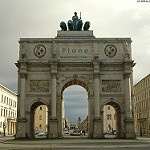

In [16]:
image = Image.open("103.jpg")
image.show()

In [17]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'buildings': 99.99994039535522, 'sea': 4.7462080488003267e-05, 'glacier': 1.670548073207101e-05, 'mountain': 3.0121713456843224e-08, 'street': 1.4520991180322351e-09}


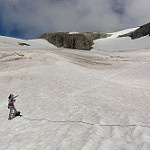

In [18]:
image = Image.open("127.jpg")
image.show()

In [19]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'glacier': 45.6129789352417, 'mountain': 30.016157031059265, 'sea': 24.356412887573242, 'buildings': 0.00938882731134072, 'forest': 0.002631159804877825}


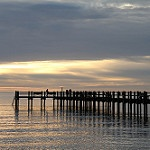

In [20]:
image = Image.open("1801.jpg")
image.show()

In [21]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'sea': 99.99388456344604, 'glacier': 0.005344278542906977, 'buildings': 0.0005303460056893528, 'mountain': 0.00021575947357632685, 'street': 9.456819327624544e-06}


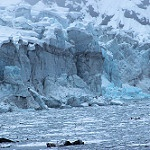

In [22]:
image = Image.open("499.jpg")
image.show()

In [23]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'mountain': 99.93211030960083, 'glacier': 0.057698425371199846, 'sea': 0.010169764573220164, 'buildings': 1.408618572895648e-05, 'forest': 7.115527722589832e-07}


Misclassified above image

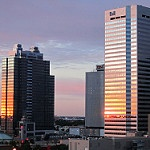

In [24]:
image = Image.open("5.jpg")
image.show()

In [25]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'buildings': 99.99991655349731, 'sea': 7.872869218772394e-05, 'street': 1.1917229425506548e-07, 'glacier': 7.40345840188894e-08, 'mountain': 2.2310299441219428e-08}


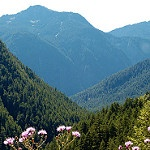

In [26]:
image = Image.open("676.jpg")
image.show()

In [27]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'mountain': 99.99994039535522, 'glacier': 5.823522428727301e-05, 'sea': 1.5670255093525043e-07, 'buildings': 2.513352581612338e-08, 'forest': 2.7238494446080175e-09}


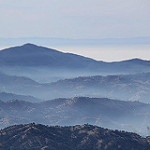

In [28]:
image = Image.open("677.jpg")
image.show()

In [29]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'mountain': 99.99655485153198, 'glacier': 0.0020832214431720786, 'sea': 0.0006621780812565703, 'buildings': 0.00041831926864688285, 'forest': 0.0002535062776587438}


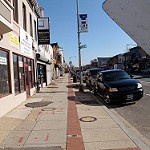

In [30]:
image = Image.open("69.jpg")
image.show()

In [31]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'street': 99.78970289230347, 'buildings': 0.21026958711445332, 'glacier': 1.3707081336633564e-05, 'mountain': 6.091978121958164e-06, 'sea': 1.9237972992414143e-06}


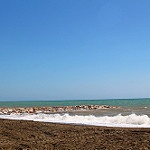

In [32]:
image = Image.open("836.jpg")
image.show()

In [33]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'sea': 99.99959468841553, 'glacier': 0.00040086479202727787, 'buildings': 1.3739415827274115e-06, 'mountain': 1.2282691308485028e-06, 'street': 8.560952502456587e-08}


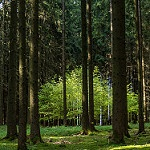

In [34]:
image = Image.open("88.jpg")
image.show()

In [35]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'forest': 99.99414682388306, 'buildings': 0.005246905857347883, 'glacier': 0.0003281483941464103, 'sea': 0.00016867502381501254, 'mountain': 0.00010052699508378282}


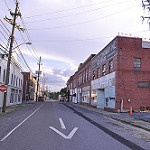

In [36]:
image = Image.open("93.jpg")
image.show()

In [37]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'buildings': 99.87002611160278, 'mountain': 0.06939496379345655, 'street': 0.04928030539304018, 'sea': 0.009061065065907314, 'glacier': 0.0022281630663201213}


misclassified above image

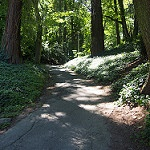

In [40]:
image = Image.open("99.jpg")
image.show()

In [41]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'mountain': 64.80607390403748, 'forest': 30.795016884803772, 'glacier': 3.3065013587474823, 'sea': 1.0372724384069443, 'buildings': 0.030427993624471128}


misclassified above image

## Testing on Production Environment

In [43]:
predictor_new = PyTorchPredictor(
    endpoint_name="Intel-Classifier-Project-prod",
    sagemaker_session=sagemaker_session,
    serializer=NumpySerializer(),
    deserializer=JSONDeserializer(),
)

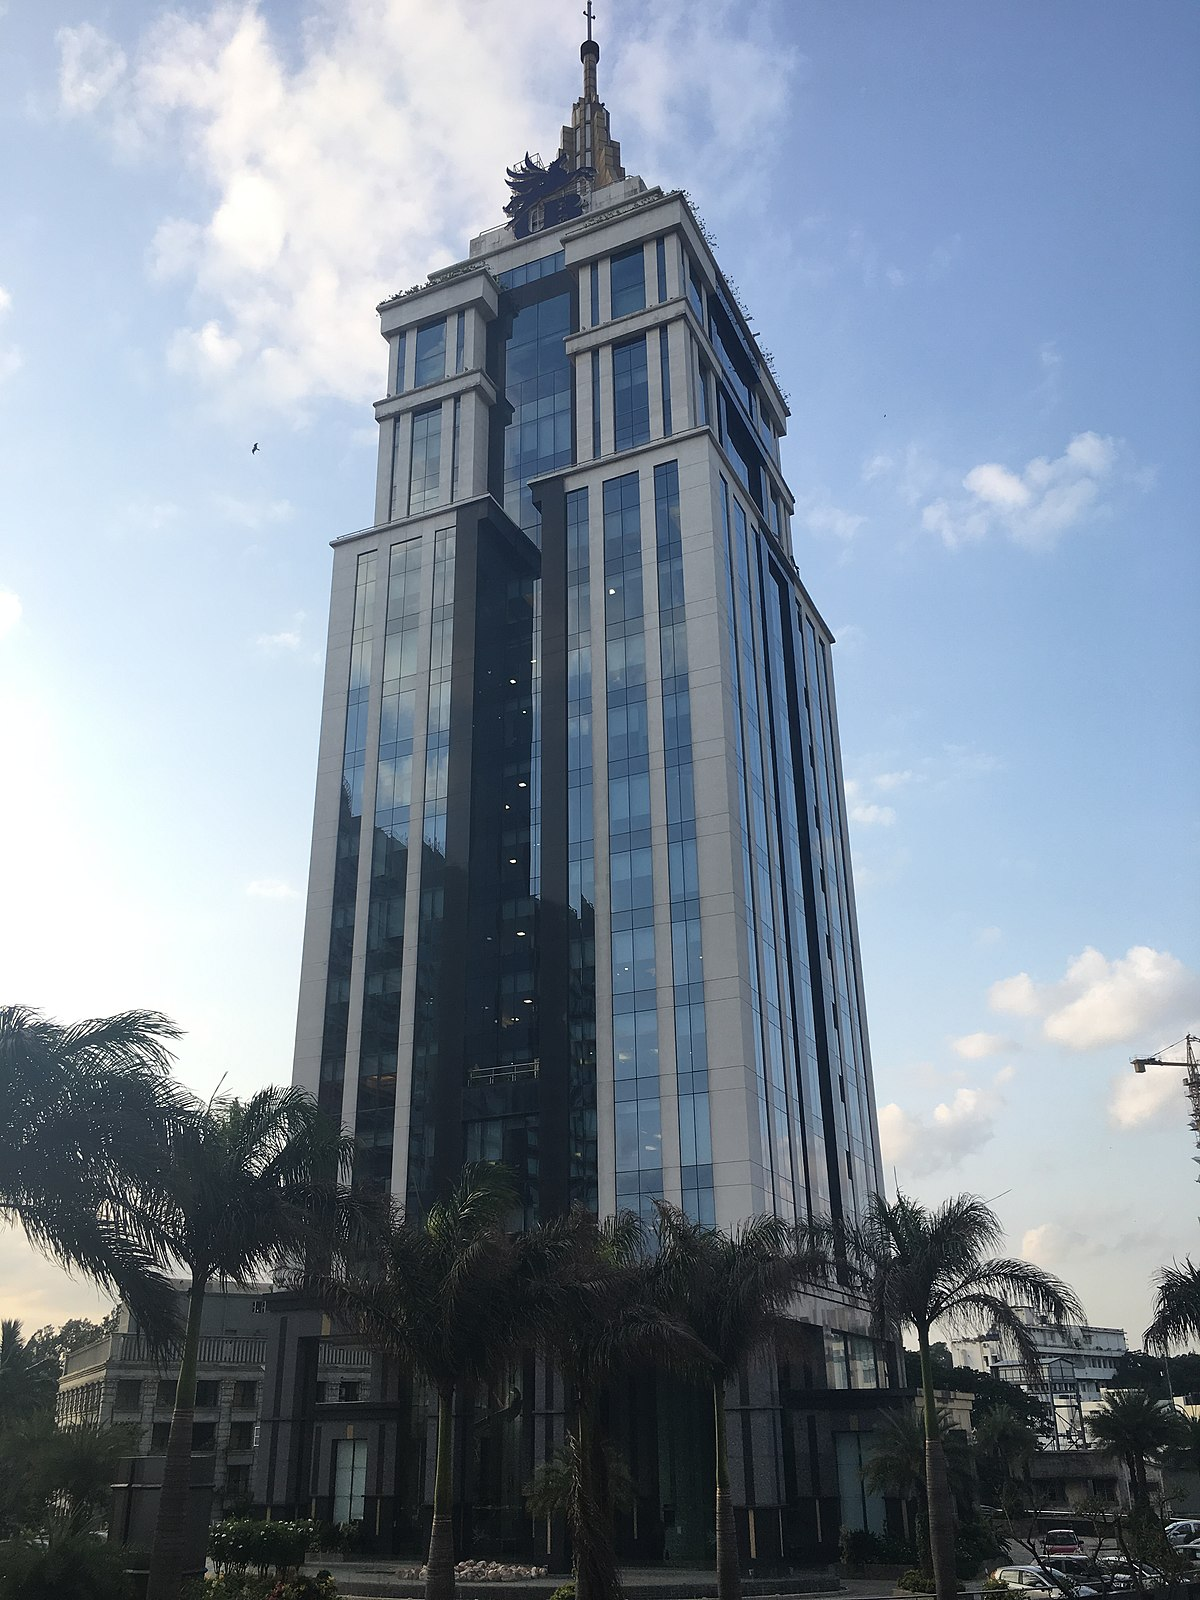

In [44]:
image = Image.open("building.jpg")
image.show()

In [45]:
# image_input = {"inputs": data}
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'buildings': 99.8691737651825, 'sea': 0.12341273250058293, 'mountain': 0.006237719935597852, 'glacier': 0.0011247856491536368, 'street': 4.529247235041112e-05}


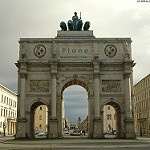

In [46]:
image = Image.open("103.jpg")
image.show()

In [47]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'buildings': 99.99994039535522, 'sea': 4.7462080488003267e-05, 'glacier': 1.670548073207101e-05, 'mountain': 3.0121713456843224e-08, 'street': 1.4520991180322351e-09}


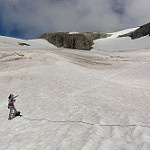

In [48]:
image = Image.open("127.jpg")
image.show()

In [49]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'glacier': 45.6129789352417, 'mountain': 30.016157031059265, 'sea': 24.356412887573242, 'buildings': 0.00938882731134072, 'forest': 0.002631159804877825}


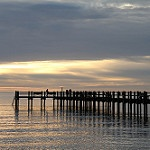

In [50]:
image = Image.open("1801.jpg")
image.show()

In [51]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'sea': 99.99388456344604, 'glacier': 0.005344278542906977, 'buildings': 0.0005303460056893528, 'mountain': 0.00021575947357632685, 'street': 9.456819327624544e-06}


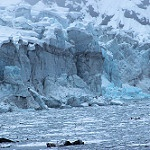

In [52]:
image = Image.open("499.jpg")
image.show()

In [53]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'mountain': 99.93211030960083, 'glacier': 0.057698425371199846, 'sea': 0.010169764573220164, 'buildings': 1.408618572895648e-05, 'forest': 7.115527722589832e-07}


Misclassified above image

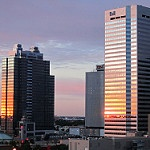

In [54]:
image = Image.open("5.jpg")
image.show()

In [55]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'buildings': 99.99991655349731, 'sea': 7.872869218772394e-05, 'street': 1.1917229425506548e-07, 'glacier': 7.40345840188894e-08, 'mountain': 2.2310299441219428e-08}


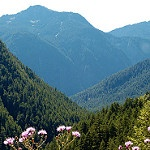

In [56]:
image = Image.open("676.jpg")
image.show()

In [57]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'mountain': 99.99994039535522, 'glacier': 5.823522428727301e-05, 'sea': 1.5670255093525043e-07, 'buildings': 2.513352581612338e-08, 'forest': 2.7238494446080175e-09}


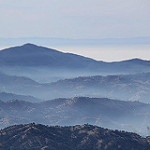

In [58]:
image = Image.open("677.jpg")
image.show()

In [59]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'mountain': 99.99655485153198, 'glacier': 0.0020832214431720786, 'sea': 0.0006621780812565703, 'buildings': 0.00041831926864688285, 'forest': 0.0002535062776587438}


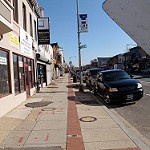

In [60]:
image = Image.open("69.jpg")
image.show()

In [61]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'street': 99.78970289230347, 'buildings': 0.21026958711445332, 'glacier': 1.3707081336633564e-05, 'mountain': 6.091978121958164e-06, 'sea': 1.9237972992414143e-06}


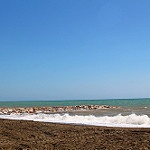

In [62]:
image = Image.open("836.jpg")
image.show()

In [63]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'sea': 99.99959468841553, 'glacier': 0.00040086479202727787, 'buildings': 1.3739415827274115e-06, 'mountain': 1.2282691308485028e-06, 'street': 8.560952502456587e-08}


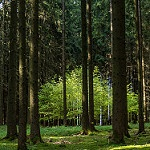

In [64]:
image = Image.open("88.jpg")
image.show()

In [65]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'forest': 99.99414682388306, 'buildings': 0.005246905857347883, 'glacier': 0.0003281483941464103, 'sea': 0.00016867502381501254, 'mountain': 0.00010052699508378282}


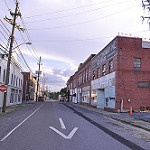

In [66]:
image = Image.open("93.jpg")
image.show()

In [67]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'buildings': 99.87002611160278, 'mountain': 0.06939496379345655, 'street': 0.04928030539304018, 'sea': 0.009061065065907314, 'glacier': 0.0022281630663201213}


misclassified above image

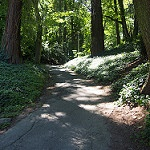

In [68]:
image = Image.open("99.jpg")
image.show()

In [69]:
image_input = numpy.array(image)
out = predictor_new.predict(image_input)
print(out)

{'mountain': 64.80607390403748, 'forest': 30.795016884803772, 'glacier': 3.3065013587474823, 'sea': 1.0372724384069443, 'buildings': 0.030427993624471128}


misclassified above image